In [1]:
!pip install git+https://github.com/imr-framework/pypulseq.git@master

  Cloning https://github.com/imr-framework/pypulseq.git (to revision master) to /tmp/pip-req-build-s9doo8wn
  Running command git clone -q https://github.com/imr-framework/pypulseq.git /tmp/pip-req-build-s9doo8wn
     |████████████████████████████████| 10.3 MB 11.5 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
  Created wheel for pypulseq: filename=pypulseq-1.3.1.post1-py3-none-any.whl size=109895 sha256=378e3a837deebccfb0b2d4a67654c4c68eb649f4609ece09f53cf7fdc16eeee2
  Stored in directory: /tmp/pip-ephem-wheel-cache-3qj1y0h7/wheels/52/05/9d/6accfdd9f13b6f9ea88661777feb40e38a9e8e182f8b3bae8a
Successfully built pypulseq
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does no

In [2]:
# Install virtual scanner
!pip install git+https://github.com/imr-framework/virtual-scanner.git@dev

  Cloning https://github.com/imr-framework/virtual-scanner.git (to revision dev) to /tmp/pip-req-build-evkorywd
  Running command git clone -q https://github.com/imr-framework/virtual-scanner.git /tmp/pip-req-build-evkorywd
  Running command git checkout -b dev --track origin/dev
  Switched to a new branch 'dev'
  Branch 'dev' set up to track remote branch 'dev' from 'origin'.
     |████████████████████████████████| 99 kB 6.3 MB/s 
     |████████████████████████████████| 81 kB 9.1 MB/s 
     |████████████████████████████████| 91 kB 10.0 MB/s 
     |████████████████████████████████| 2.1 MB 38.6 MB/s 
     |████████████████████████████████| 2.8 MB 40.2 MB/s 
     |████████████████████████████████| 124 kB 49.0 MB/s 
     |████████████████████████████████| 312 kB 55.7 MB/s 
     |████████████████████████████████| 51 kB 455 kB/s 
     |████████████████████████████████| 59 kB 5.3 MB/s 
     |████████████████████████████████| 89 kB 7.1 MB/s 
     |████████████████████████████████| 87 kB 5.6 M

In [3]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 98 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
virtual-scanner 1.0.26 requires matplotlib>=3.3.4, but you have matplotlib 3.1.3 which is incompatible.
pypulseq 1.3.1.post1 requires matplotlib>=3.3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
!pip install sigpy

     |████████████████████████████████| 140 kB 9.1 MB/s 


In [5]:
import numpy as np 
import virtualscanner.server.simulation.bloch.spingroup_ps as sg
from virtualscanner.server.simulation.rf_sim.rf_simulations import simulate_rf
from virtualscanner.server.simulation.rf_sim.animate_spins import animate_spins
import matplotlib.pyplot as plt 
import math 
from pypulseq.sigpy2pulseq import * 
import sigpy.mri.rf as rf_ext
from scipy.io import savemat, loadmat

from pypulseq.Sequence.sequence import Sequence
from pypulseq.make_adc import make_adc
from pypulseq.make_sinc_pulse import make_sinc_pulse
from pypulseq.make_gauss_pulse import make_gauss_pulse
from pypulseq.make_block_pulse import make_block_pulse
from pypulseq.make_trap_pulse import make_trapezoid
from pypulseq.opts import Opts

# 1. Make some RF pulses using PyPulseq & sigpy.rf

PyPulseq:
* Sinc
* Gauss
* Rect

Sigpy.rf
* SLR 90 
* SLR 180
* SMS 


In [6]:
# Set shared system limits, parameters, and physical coefficients
system = Opts(max_grad=32, grad_unit='mT/m', max_slew=130, slew_unit='T/m/s', rf_ringdown_time=30e-6,
              rf_dead_time=100e-6)

GAMMA_BAR = 42.58e6 # Hz/T
thk = 5e-3 
t_ex = 1e-3 
flip_ex = 90
flip_inv = 180 


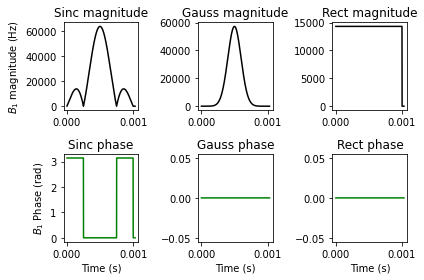

In [7]:
# Make pypulseq RF pulses and visualize 
# 1. Sinc
rf_ex_1, g_ss_1, _ = make_sinc_pulse(flip_angle=flip_ex, system=system, duration=t_ex, slice_thickness=thk, return_gz = True)
rf_ex_2, g_ss_2, _ = make_gauss_pulse(flip_angle=flip_ex, system=system, duration=t_ex, slice_thickness=thk, return_gz=True)
rf_ex_3, g_ss_3,  = make_block_pulse(flip_angle=flip_ex, system=system, duration=t_ex, slice_thickness=thk,  return_gz=True)

plt.figure(1)

plt.subplot(231)
plt.plot(rf_ex_1.t, np.abs(rf_ex_1.signal),'-k')
plt.ylabel(r'$B_1$ magnitude (Hz)')
plt.title('Sinc magnitude')

plt.subplot(234)
plt.plot(rf_ex_1.t, np.angle(rf_ex_1.signal),'-g')
plt.xlabel('Time (s)')
plt.ylabel(r'$B_1$ Phase (rad)')
plt.title('Sinc phase')

plt.subplot(232)
plt.plot(rf_ex_2.t, np.abs(rf_ex_2.signal),'-k')

plt.title('Gauss magnitude')

plt.subplot(235)
plt.title('Gauss phase')
plt.plot(rf_ex_2.t, np.angle(rf_ex_2.signal),'-g')
plt.xlabel('Time (s)')


plt.subplot(233)
plt.title('Rect magnitude')
plt.plot(rf_ex_3.t, np.abs(rf_ex_3.signal),'-k')

plt.subplot(236)
plt.title('Rect phase')
plt.plot(rf_ex_3.t, np.angle(rf_ex_3.signal),'-g')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

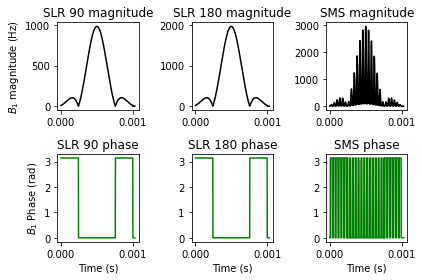

In [10]:
# Make sigpy.rf pulses and visualize
# Common parameters
duration = 1e-3  # seconds
tb = 4
alpha = 90  
alpha_inv = 180
slice_thickness = 5e-3  # slice

# 1. SLR 90 
# Declare pulse configuration inputs here
pulse_freq_offset = 0.0  # if designing rf pulse without a FM
pulse_slr90 = rf_ext.slr.dzrf(n=int(round(duration / system.rf_raster_time)), tb=tb, ptype='st', ftype='ls', d1=0.01, d2=0.01, cancel_alpha_phs=True)

# Convert and integrate with pypulseq
rf_slr90, gz_slr90, gzr_slr90, _ = sig_2_seq(pulse=pulse_slr90, flip_angle=alpha * math.pi / 180, system=system, duration=duration,
                              slice_thickness=slice_thickness,
                              return_gz=True, time_bw_product=tb, rf_freq=0)

# 2. SLR 180 
pulse_freq_offset = 0.0  # if designing rf pulse without a FM
pulse_slr180 = rf_ext.slr.dzrf(n=int(round(duration / system.rf_raster_time)), tb=tb, ptype='st', ftype='ls', d1=0.01, d2=0.01, cancel_alpha_phs=True)

# Convert and integrate with pypulseq
rf_slr180, gz_slr180, gzr_slr180, _ = sig_2_seq(pulse=pulse_slr180, flip_angle=alpha_inv * math.pi / 180, system=system, duration=duration,
                              slice_thickness=slice_thickness,
                              return_gz=True, time_bw_product=tb, rf_freq=0)


# 3. SMS 
pulse_in = rf_ext.slr.dzrf(n=int(round(duration / system.rf_raster_time)), tb=tb, ptype='st', ftype='ls', d1=0.01, d2=0.01, cancel_alpha_phs=False)
pulse_sms = rf_ext.multiband.mb_rf(pulse_in, n_bands=3, band_sep=25, phs_0_pt='None')

# Convert and integrate with pypulseq
rf_sms, gz_sms, gzr_sms, _ = sig_2_seq(pulse=pulse_sms, flip_angle=alpha * math.pi / 180, system=system, duration=duration,
                              slice_thickness=slice_thickness,
                              return_gz=True, time_bw_product=tb, rf_freq=0)



# Display
# Display if needed
#disp_pulse(pulse_hypsec, pulse_freq_offset, tb, duration_hypsec, system)
#disp_pulse(pulse_slr, 0, tb, duration, system)
plt.figure(2)

plt.subplot(231)
plt.plot(rf_slr90.t, np.abs(rf_slr90.signal),'-k')
plt.ylabel(r'$B_1$ magnitude (Hz)')
plt.title('SLR 90 magnitude')

plt.subplot(234)
plt.plot(rf_slr90.t, np.angle(rf_slr90.signal),'-g')
plt.xlabel('Time (s)')
plt.ylabel(r'$B_1$ Phase (rad)')
plt.title('SLR 90 phase')

plt.subplot(232)
plt.plot(rf_slr180.t, np.abs(rf_slr180.signal),'-k')
plt.title('SLR 180 magnitude')

plt.subplot(235)
plt.title('SLR 180 phase')
plt.plot(rf_slr180.t, np.angle(rf_slr180.signal),'-g')
plt.xlabel('Time (s)')


plt.subplot(233)
plt.title('SMS magnitude')
plt.plot(rf_sms.t, np.abs(rf_sms.signal),'-k')

plt.subplot(236)
plt.title('SMS phase')
plt.plot(rf_sms.t, np.angle(rf_sms.signal),'-g')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()


In [11]:
rf_dict = {'sinc': rf_ex_1, 'gauss': rf_ex_2, 'rect': rf_ex_3, 
            'slr90': rf_slr90, 'slr180': rf_slr180, 'sms': rf_sms}

grad_dict = {'sinc': g_ss_1, 'gauss': g_ss_1, 'rect': g_ss_3,
             'slr90': gz_slr90, 'slr180': gz_slr180, 'sms': gz_sms}

# 2. Simulate pulses with Virtual Scanner 2.0 

In [12]:
# Simulate
Mxyz = {}
bws = []
for pulse_type in rf_dict.keys(): # Simulate each pulse in the same manner   
  gz = grad_dict[pulse_type]
  rf = rf_dict[pulse_type]

  print(f'Pulse type: {pulse_type}; Slice bw : {thk*gz.amplitude} Hz')
  bw = 2*thk*gz.amplitude

  if pulse_type == 'sms':
    bw = bw*10
  
  bws.append(bw)

  if isinstance(rf, list):
    rf_dt = rf[0].t[-1] - rf[0].t[0]
    rf_signal = hypsec_signal

  else:
    rf_dt = rf.t[1] - rf.t[0]
    rf_signal = rf.signal  

  signals, m = simulate_rf(bw_spins=bw, n_spins=200, pdt1t2=(1,0,0), dt=rf_dt, flip_angle=90,
                      solver="RK45", pulse_type='custom', pulse_shape=rf_signal/GAMMA_BAR, display=False)
  
  Mxyz[pulse_type] = m 
  print(m.shape)
print(bws)

Pulse type: sinc; Slice bw : 4000.0 Hz
Time points not specified; using dt_rf instead
(200, 3, 1030)
Pulse type: gauss; Slice bw : 4000.0 Hz
Time points not specified; using dt_rf instead
(200, 3, 1030)
Pulse type: rect; Slice bw : 250.0 Hz
Time points not specified; using dt_rf instead
(200, 3, 1030)
Pulse type: slr90; Slice bw : 4000.0 Hz
Time points not specified; using dt_rf instead
(200, 3, 1030)
Pulse type: slr180; Slice bw : 4000.0 Hz
Time points not specified; using dt_rf instead
(200, 3, 1030)
Pulse type: sms; Slice bw : 4000.0 Hz
Time points not specified; using dt_rf instead
(200, 3, 1030)
[8000.0, 8000.0, 500.0, 8000.0, 8000.0, 80000.0]


In [13]:
# Save simulated data
savemat('rf_simulated_data.mat',{'all_results': Mxyz, 'pulse_types': list(rf_dict.keys()), 'bw': bws, 'n_spins': 200})

<Figure size 432x288 with 0 Axes>

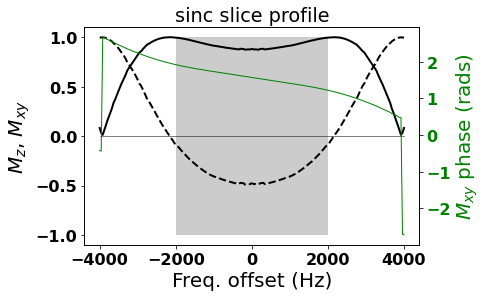

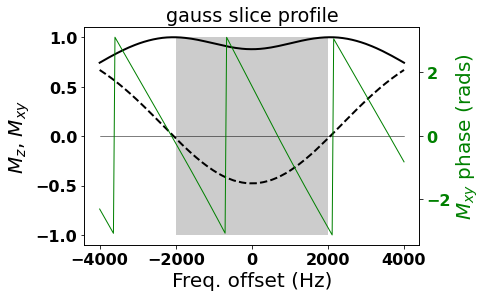

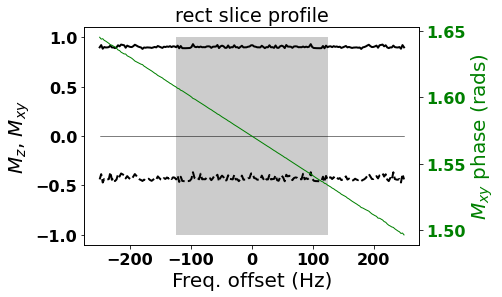

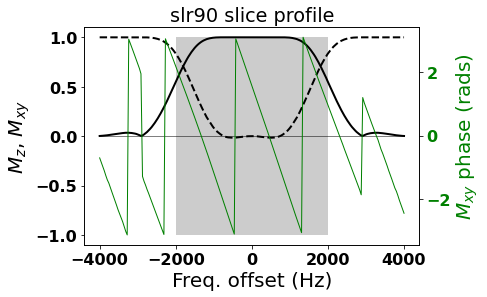

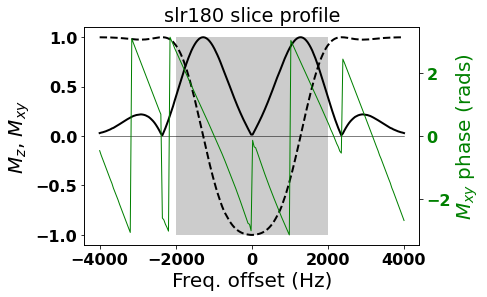

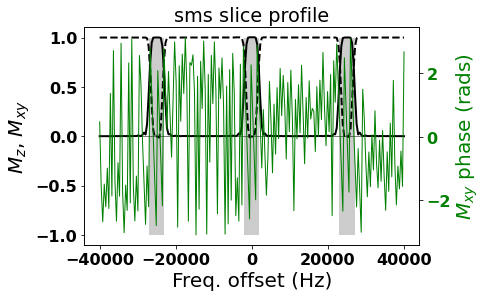

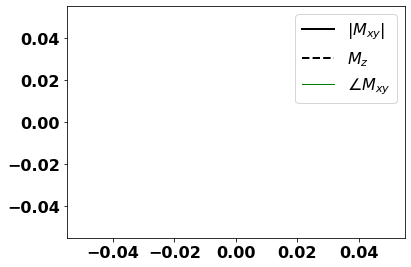

In [14]:
# Display slice profile

import matplotlib
import matplotlib.patches as patches

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)


u = 1 
for pulse_type in rf_dict.keys():
  m = Mxyz[pulse_type]

  spin_freqs = np.linspace(-bws[u-1]/2,bws[u-1]/2,200)
  mx = m[:,0,-1]
  my = m[:,1,-1]
  mxy = mx + 1j*my 
  mz = m[:,2,-1]

  plt.figure(u)
  fig, ax1 = plt.subplots()

  if pulse_type == 'sms':
    total_bw = bws[u-1]
    bw_thk = total_bw / 20
    rect1 = patches.Rectangle((-bw_thk/2 - 25e3,-1), bw_thk, 2, linewidth=0, edgecolor='r', facecolor=[0.8,0.8,0.8])
    rect2 = patches.Rectangle((-bw_thk/2,-1), bw_thk, 2, linewidth=0, edgecolor='r', facecolor=[0.8,0.8,0.8])
    rect3 = patches.Rectangle((-bw_thk/2 + 25e3,-1), bw_thk, 2, linewidth=0, edgecolor='r', facecolor=[0.8,0.8,0.8])

    ax1.add_patch(rect1)
    ax1.add_patch(rect2)
    ax1.add_patch(rect3)
  else:
    rect = patches.Rectangle((-bws[u-1]/4, -1), bws[u-1]/2, 2, linewidth=0, edgecolor='r', facecolor=[0.8,0.8,0.8])
    ax1.add_patch(rect)


  plt.title(f'{pulse_type} slice profile')
  ax2 = ax1.twinx()
  ax2.set_ylabel(r'$M_{xy}$ phase (rads)', color='green',fontsize=20)
  ax2.plot(spin_freqs,np.angle(mxy), label=r'$\angle M_{xy}$',color='green',linewidth=1)
  ax2.tick_params(axis='y', labelcolor='green')
  
  ax1.set_ylabel(r'$M_{z}$, $M_{xy}$', fontsize=20)
  ax1.plot(spin_freqs,np.abs(mxy), label=r'$|M_{xy}|$', color='black',linewidth=2)
  ax1.plot(spin_freqs,mz, label=r'$M_z$', color='black', linestyle='dashed',linewidth=2)
  ax1.tick_params(axis='y',labelcolor='black')

  ax1.plot(spin_freqs,np.zeros(len(spin_freqs)),'-k',linewidth=0.5)
  ax1.set_xlabel('Freq. offset (Hz)',color='black',fontsize=20)

  u += 1


  
  
plt.figure()
plt.plot([],[],label=r'$|M_{xy}|$', color='black',linewidth=2)  
plt.plot([],[],label=r'$M_z$', color='black',linestyle='dashed',linewidth=2)  
plt.plot([],[],label=r'$\angle M_{xy}$',color='green',linewidth=1)  
plt.legend()
#ax2.legend()


plt.tight_layout()
plt.show()


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


(200, 3, 1030)
Saving gif....


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

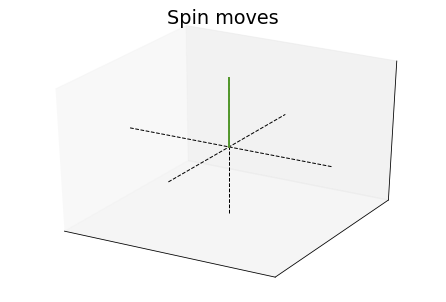

In [15]:
# Display spin animation with 5 spins 
choose_rf_type = 'sinc'  # Choose from: ['sinc', 'gauss', 'rect', 'slr', 'sms', 'hypsec']

from matplotlib import rc
from google.colab import files
rc('animation', html='jshtml')

m = Mxyz[choose_rf_type]
print(m.shape)
this_m_data = np.swapaxes(m[50:151:50,:,:],1,2)
anim = animate_spins(m_data=this_m_data, acc_factor=1, xyzlines=True, view_fig=False, save_fig=True) # figure is saved as gif
files.download('spin_moves.gif')

# 3. Simulate pulses with Sigpy.rf 

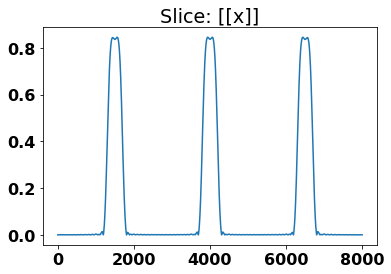

In [16]:
import sigpy.plot as pl 
import sigpy.mri.rf as rf_ext

  # Display if needed
  #if (disp_pulse):
  #    if (ext_pulse_type == 'hypsec'):
  #        sp.disp_pulse(pulse_hypsec, pulse_freq_offset, tb, duration_hypsec, system)
  #    else:
  #        sp.disp_pulse(pulse, 0, tb, duration, system)
  #am_pulse = pulse_slr

sim_results = {}

for pulse_type in rf_dict.keys():
  if pulse_type == 'hypsec':
    input_pulse = pulse_hypsec_sim
    bw_factor =  1
  elif pulse_type == 'slr':
    input_pulse = pulse_slr
    bw_factor = 1
  elif pulse_type == 'sms':
    input_pulse = pulse_sms 
    bw_factor = 10
  else: 
    continue
  # Simulate it
  a = 1
  x = np.arange(-bw_factor*tb, bw_factor*tb, 0.01)
  [a, b] = rf_ext.sim.abrm(input_pulse, x, True)
  Mxy = 2 * np.multiply(np.conj(a), b)
  pl.LinePlot(Mxy)

  sim_results[pulse_type] = Mxy 

savemat('sigpy_simulated_data.mat',sim_results)